In [163]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fifa19/data.csv


In [164]:
# import necessary modules
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
data = pd.read_csv('/kaggle/input/fifa19/data.csv', index_col = 0)
df = data.copy()

In [166]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [168]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [169]:
newcol = []

for col in df.columns:
    newcol.append(col.replace(' ', ''))
    
df.columns = newcol

In [170]:
df.drop(['ID', 'Photo', 'Flag', 'ClubLogo', 'ReleaseClause', 'LoanedFrom', 'RealFace'], inplace=True, axis=1)

In [171]:
# Split Work Rate
df[['WorkRate1', 'WorkRate2']] = df['WorkRate'].str.split('/', expand=True)
df = df.drop('WorkRate', axis=1)
# Check
df[['WorkRate1', 'WorkRate2']].head()

,WorkRate1,WorkRate2
0,Medium,Medium
1,High,Low
2,High,Medium
3,Medium,Medium
4,High,High


In [172]:
Height_cm = []
for i in list(df['Height'].values):
    try:
        Height_cm.append((float(str(i)[0])*12.0 + float(str(i)[2:]))*2.54)
    except(ValueError):
        Height_cm.append(np.nan)
        
df['Height_cm'] = Height_cm

In [173]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'PreferredFoot', 'InternationalReputation',
       'WeakFoot', 'SkillMoves', 'BodyType', 'Position', 'JerseyNumber',
       'Joined', 'ContractValidUntil', 'Height', 'Weight', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'WorkRate1',
       'WorkRat

In [174]:
# Not exactly certain whether it's ok to fill NA the following way or simply leave those NaN
# Values alone and exclude them from my machine learning model. 

In [175]:
# Filling numerical values
fill_na_mean = df.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes' ]]
for i in fill_na_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)

In [176]:
# Filling "objects" / ccategorical values
fill_na_mode = df.loc[:, [ 'LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 
        'RCB', 'RB','Position', 'Joined', 'ContractValidUntil','BodyType',
        'InternationalReputation', 'Height', 'Weight', 'PreferredFoot','JerseyNumber', 
        'WorkRate1', 'WorkRate2', 'Height_cm']]
for i in fill_na_mode.columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [177]:

fill_na_median = df.loc[:, ['WeakFoot', 'SkillMoves']]
for i in fill_na_median.columns:
    df[i].fillna(df[i].median(), inplace = True)

In [178]:
# Replace NA with Freelance
df["Club"].fillna("Freelance", inplace = True)

In [179]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [180]:
# Convert non-numerical values such as "K" to appropriate values
def parse_money(s):
    if s.startswith('€'):
        s = s[1:]
    multiplier = None
    if s.endswith('M'):
        s = s[:-1]
        multiplier = 10**6
    elif s.endswith('B'):
        s = s[:-1]
        multiplier = 10**9
    elif s.endswith('K'):
        s = s[:-1]
        multiplier = 10**3
    f = float(s)
    if multiplier:
        f = f * multiplier
    return f

In [181]:
df['Value'] = df['Value'].apply(parse_money)
df['Wage'] = df['Wage'].apply(parse_money)
df[['Value', 'Wage']].head()

,Value,Wage
0,110500000.0,565000.0
1,77000000.0,405000.0
2,118500000.0,290000.0
3,72000000.0,260000.0
4,102000000.0,355000.0


In [182]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,WorkRate1,WorkRate2,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,Medium,Medium,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,High,Low,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,High,Medium,175.26
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Medium,Medium,193.04
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,High,High,180.34


In [183]:
df['Weight']=df['Weight'].str.replace('lbs','')

In [184]:
'''df['Height'] = df['Height'].astype(str)
df['Height'] = df['Height'].apply(parse_ht)'''
df['Height_cm'].head()
# Will use the cm values (this metric is a better measure as it is used worldwide)

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height_cm, dtype: float64

In [185]:
# Convert Year + Month --> to just Year
def convert_to_year(s):
    if isinstance(s, str) and ',' in s:
        return float(s.split()[2])
    else:
        return float(s)

In [186]:
df['ContractValidUntil'] = df['ContractValidUntil'].apply(convert_to_year)
df['ContractValidUntil'].head()

0    2021.0
1    2022.0
2    2022.0
3    2020.0
4    2023.0
Name: ContractValidUntil, dtype: float64

In [187]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [188]:
df['BodyType'].value_counts()

Normal                 10643
Lean                    6417
Stocky                  1140
C. Ronaldo                 1
Neymar                     1
Courtois                   1
Messi                      1
Shaqiri                    1
Akinfenwa                  1
PLAYER_BODY_TYPE_25        1
Name: BodyType, dtype: int64

In [189]:
df.loc[df['BodyType'].isin(['Normal', 'Stocky', 'Lean']), 'BodyType'] = df['BodyType'].value_counts().index[0]
df['BodyType'].value_counts()

Normal                 18200
C. Ronaldo                 1
Neymar                     1
Courtois                   1
Messi                      1
Shaqiri                    1
Akinfenwa                  1
PLAYER_BODY_TYPE_25        1
Name: BodyType, dtype: int64

In [190]:

q1_wage=df.Wage.quantile(0.25)
q3_wage=df.Wage.quantile(0.75)
iqr_wage= q3_wage - q1_wage

q1_val=df.Value.quantile(0.25)
q3_val=df.Value.quantile(0.75)
iqr_val= q3_val - q1_val

upperwage= q3_wage + iqr_wage*1.5
upperval= q3_val + iqr_val*1.5


In [191]:
df.loc[df['Wage'] > upperwage]
len(df.loc[df['Wage'] > upperwage])

2031

In [192]:
df.loc[df['Value']> upperval]
len(df.loc[df['Value']> upperval])

2487

In [193]:
#df.isnull().sum()[df.isnull().sum() > 0]
null_counts(df)

Name : 0
Age : 0
Nationality : 0
Overall : 0
Potential : 0
Club : 0
Value : 0
Wage : 0
Special : 0
PreferredFoot : 0
InternationalReputation : 0
WeakFoot : 0
SkillMoves : 0
BodyType : 0
Position : 0
JerseyNumber : 0
Joined : 0
ContractValidUntil : 0
Height : 0
Weight : 0
LS : 0
ST : 0
RS : 0
LW : 0
LF : 0
CF : 0
RF : 0
RW : 0
LAM : 0
CAM : 0
RAM : 0
LM : 0
LCM : 0
CM : 0
RCM : 0
RM : 0
LWB : 0
LDM : 0
CDM : 0
RDM : 0
RWB : 0
LB : 0
LCB : 0
CB : 0
RCB : 0
RB : 0
Crossing : 0
Finishing : 0
HeadingAccuracy : 0
ShortPassing : 0
Volleys : 0
Dribbling : 0
Curve : 0
FKAccuracy : 0
LongPassing : 0
BallControl : 0
Acceleration : 0
SprintSpeed : 0
Agility : 0
Reactions : 0
Balance : 0
ShotPower : 0
Jumping : 0
Stamina : 0
Strength : 0
LongShots : 0
Aggression : 0
Interceptions : 0
Positioning : 0
Vision : 0
Penalties : 0
Composure : 0
Marking : 0
StandingTackle : 0
SlidingTackle : 0
GKDiving : 0
GKHandling : 0
GKKicking : 0
GKPositioning : 0
GKReflexes : 0
WorkRate1 : 0
WorkRate2 : 0
Height_cm :

In [194]:
# How to substitute 0 for NA for only GK
len(df[df['Position'] == 'GK'])

2025

In [195]:
# Fill Null values with 0 since goalkeepers field attributes are irrelevant
df.loc[df['Position'] == 'GK', :].fillna(0, inplace = True)

In [196]:
df.loc[df['Position'] == 'GK']

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,WorkRate1,WorkRate2,Height_cm
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Medium,Medium,193.04
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,1331,Right,...,12.0,18.0,86.0,92.0,78.0,88.0,89.0,Medium,Medium,187.96
18,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000.0,240000.0,1328,Right,...,13.0,10.0,87.0,85.0,88.0,85.0,90.0,Medium,Medium,187.96
19,T. Courtois,26,Belgium,89,90,Real Madrid,53500000.0,240000.0,1311,Left,...,18.0,16.0,85.0,91.0,72.0,86.0,88.0,Medium,Medium,198.12
22,M. Neuer,32,Germany,89,89,FC Bayern München,38000000.0,130000.0,1473,Right,...,10.0,11.0,90.0,86.0,91.0,87.0,87.0,Medium,Medium,193.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,L. Wahlstedt,18,Sweden,48,65,Dalkurd FF,50000.0,1000.0,738,Right,...,11.0,10.0,47.0,46.0,50.0,45.0,51.0,Medium,Medium,182.88
18180,M. Hurst,22,Scotland,48,58,St. Johnstone FC,40000.0,1000.0,987,Right,...,15.0,16.0,45.0,49.0,50.0,50.0,45.0,Medium,Medium,185.42
18183,K. Pilkington,44,England,48,48,Cambridge United,0.0,1000.0,774,Right,...,15.0,13.0,45.0,48.0,44.0,49.0,46.0,Medium,Medium,187.96
18194,J. Milli,18,Italy,47,65,Lecce,50000.0,1000.0,731,Right,...,10.0,11.0,52.0,52.0,52.0,40.0,44.0,Medium,Medium,190.50


In [197]:
sns.set_style('whitegrid')

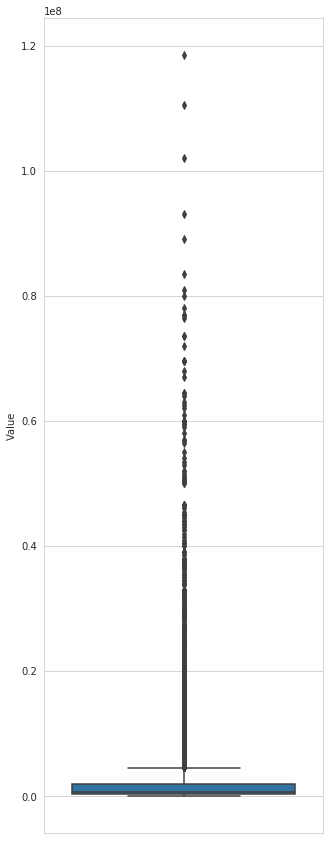

In [198]:
plt.figure(figsize = [5, 15])
sns.boxplot( y=df["Value"] )


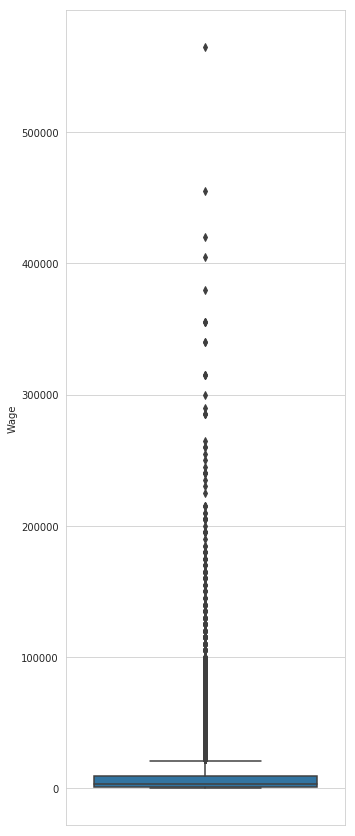

In [199]:
plt.figure(figsize = [5, 15])
sns.boxplot( y=df["Wage"] )

In [200]:
df[['Wage','Value']].describe()

,Wage,Value
count,18207.000000,1.820700e+04
mean,9731.312133,2.410696e+06
std,21999.290406,5.594933e+06
min,0.000000,0.000000e+00
25%,1000.000000,3.000000e+05
50%,3000.000000,6.750000e+05
75%,9000.000000,2.000000e+06
max,565000.000000,1.185000e+08


In [201]:
#Number of countries available and top 5 countries with highest number of players
print('Total # of Nationalities : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))

#Most players consist of European Nationalities

Total # of Nationalities : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


In [202]:
#Most Valuable Players

print('Highest Value : '+str(df.loc[df['Value'].idxmax()][0]))
print('Highest Wage : '+str(df.loc[df['Wage'].idxmax()][0]))

Highest Value : Neymar Jr
Highest Wage : L. Messi


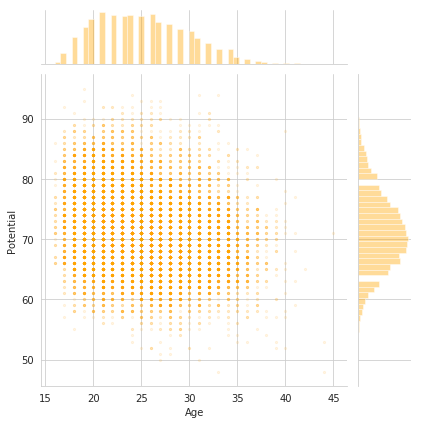

In [203]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'orange'},
              marginal_kws={'color':'orange'})

Text(0, 0.5, 'Count')

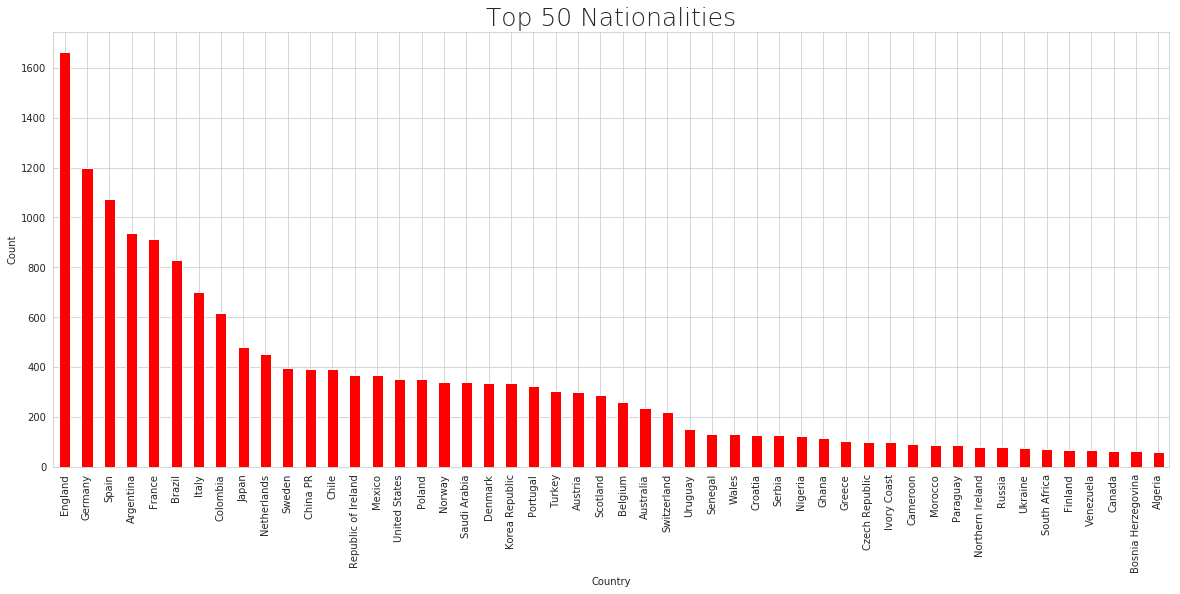

In [204]:
#df['Nationality'].value_counts().head(5).plot(kind = 'bar', figsize = [10,5], colors =['r','g','b','orange','y'] )

df['Nationality'].value_counts().head(50).plot.bar(color = 'r', figsize = (20, 8))
plt.title('Top 50 Nationalities', fontsize = 25, fontweight = 15)
plt.xlabel('Country')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Age')

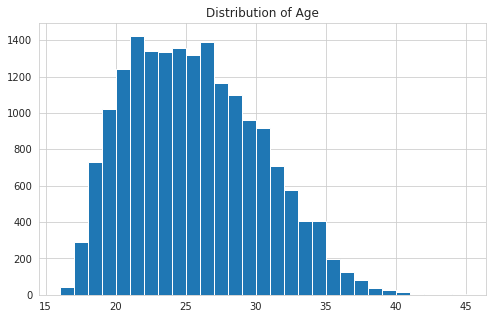

In [205]:
bins = np.arange(df['Age'].min(), df['Age'].max()+1, 1)
plt.figure(figsize = [8, 5])
plt.hist(df['Age'], bins = bins)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Value')

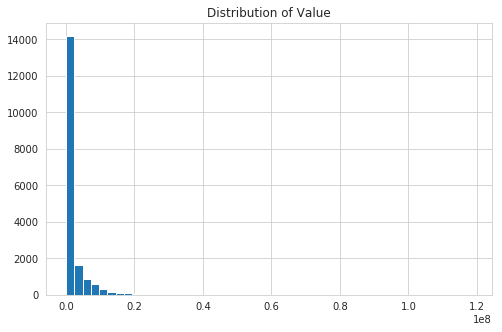

In [206]:
#bins = np.arange(df['Value'].min(), df['Value'].max()+1, 1)
plt.figure(figsize = [8, 5])
plt.hist(df['Value'], bins = 49)
plt.title('Distribution of Value')

Text(0.5, 1.0, 'Distribution of Wage')

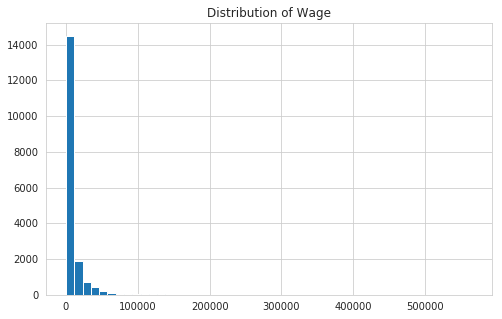

In [207]:
#bins = np.arange(df['Wage'].min(), df['Wage'].max()+1, 1)
plt.figure(figsize = [8, 5])
plt.hist(df['Wage'], bins = 49)
plt.title('Distribution of Wage')

Text(0.5, 0, 'Age')

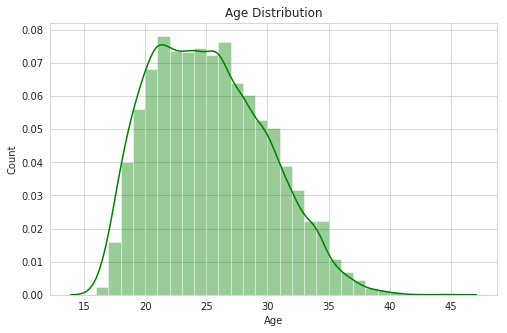

In [208]:
bins1 = np.arange(df['Age'].min(), df['Age'].max()+1, 1)
plt.figure(figsize = (8,5))
sns.distplot(df['Age'], color = 'green', bins = bins1)
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')


Text(0.5, 0, 'Value')

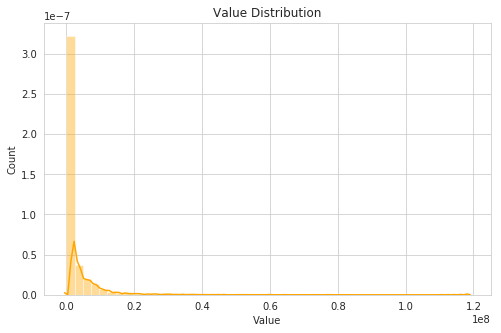

In [209]:
#bins2 = np.arange(df['Value'].min(), df['Value'].max()+1, 1)
plt.figure(figsize = (8,5))
sns.distplot(df['Value'], bins = 49, color = 'orange')
plt.title('Value Distribution')
plt.ylabel('Count')
plt.xlabel('Value')


Text(0.5, 0, 'Wage')

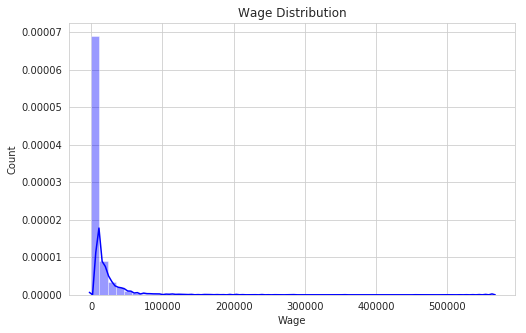

In [210]:
#bins3 = np.arange(df['Wage'].min(), df['Wage'].max()+1, 1)
plt.figure(figsize = (8,5))
sns.distplot(df['Wage'], color = 'blue', bins = 49)
plt.title('Wage Distribution')
plt.ylabel('Count')
plt.xlabel('Wage')

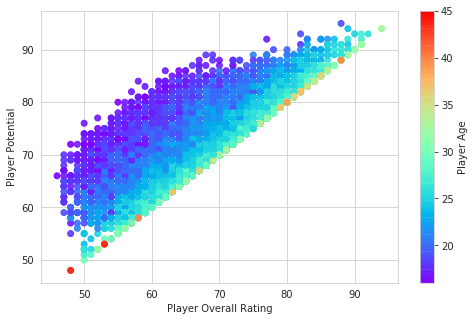

In [211]:
plt.figure(figsize=[8,5])
plt.scatter(x=df.Overall, y=df.Potential, c=df.Age, alpha=0.9, cmap='rainbow' )
plt.colorbar().set_label('Player Age')
plt.xlabel('Player Overall Rating')
plt.ylabel('Player Potential')
plt.show()

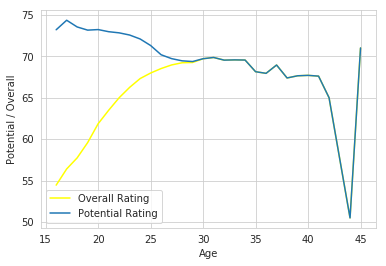

In [212]:
_ = sns.lineplot(x = 'Age', y = 'Overall', ci = None, data = df, label = 'Overall Rating', color = 'yellow')
_ = sns.lineplot(x = 'Age', y = 'Potential', ci = None, data = df, label = 'Potential Rating')
_ = plt.ylabel('Potential / Overall')
_ = plt.legend(loc = 3)

# Footballers reach their full potential at around age 30? 



In [213]:
# Sort Top 15 Players based on their Value and Wage
df.sort_values(by = 'Value', ascending = False)[['Name','Value','Wage']][:15]

,Name,Value,Wage
2,Neymar Jr,118500000.0,290000.0
0,L. Messi,110500000.0,565000.0
4,K. De Bruyne,102000000.0,355000.0
5,E. Hazard,93000000.0,340000.0
15,P. Dybala,89000000.0,205000.0
16,H. Kane,83500000.0,205000.0
25,K. Mbappé,81000000.0,100000.0
7,L. Suárez,80000000.0,455000.0
17,A. Griezmann,78000000.0,145000.0
10,R. Lewandowski,77000000.0,205000.0


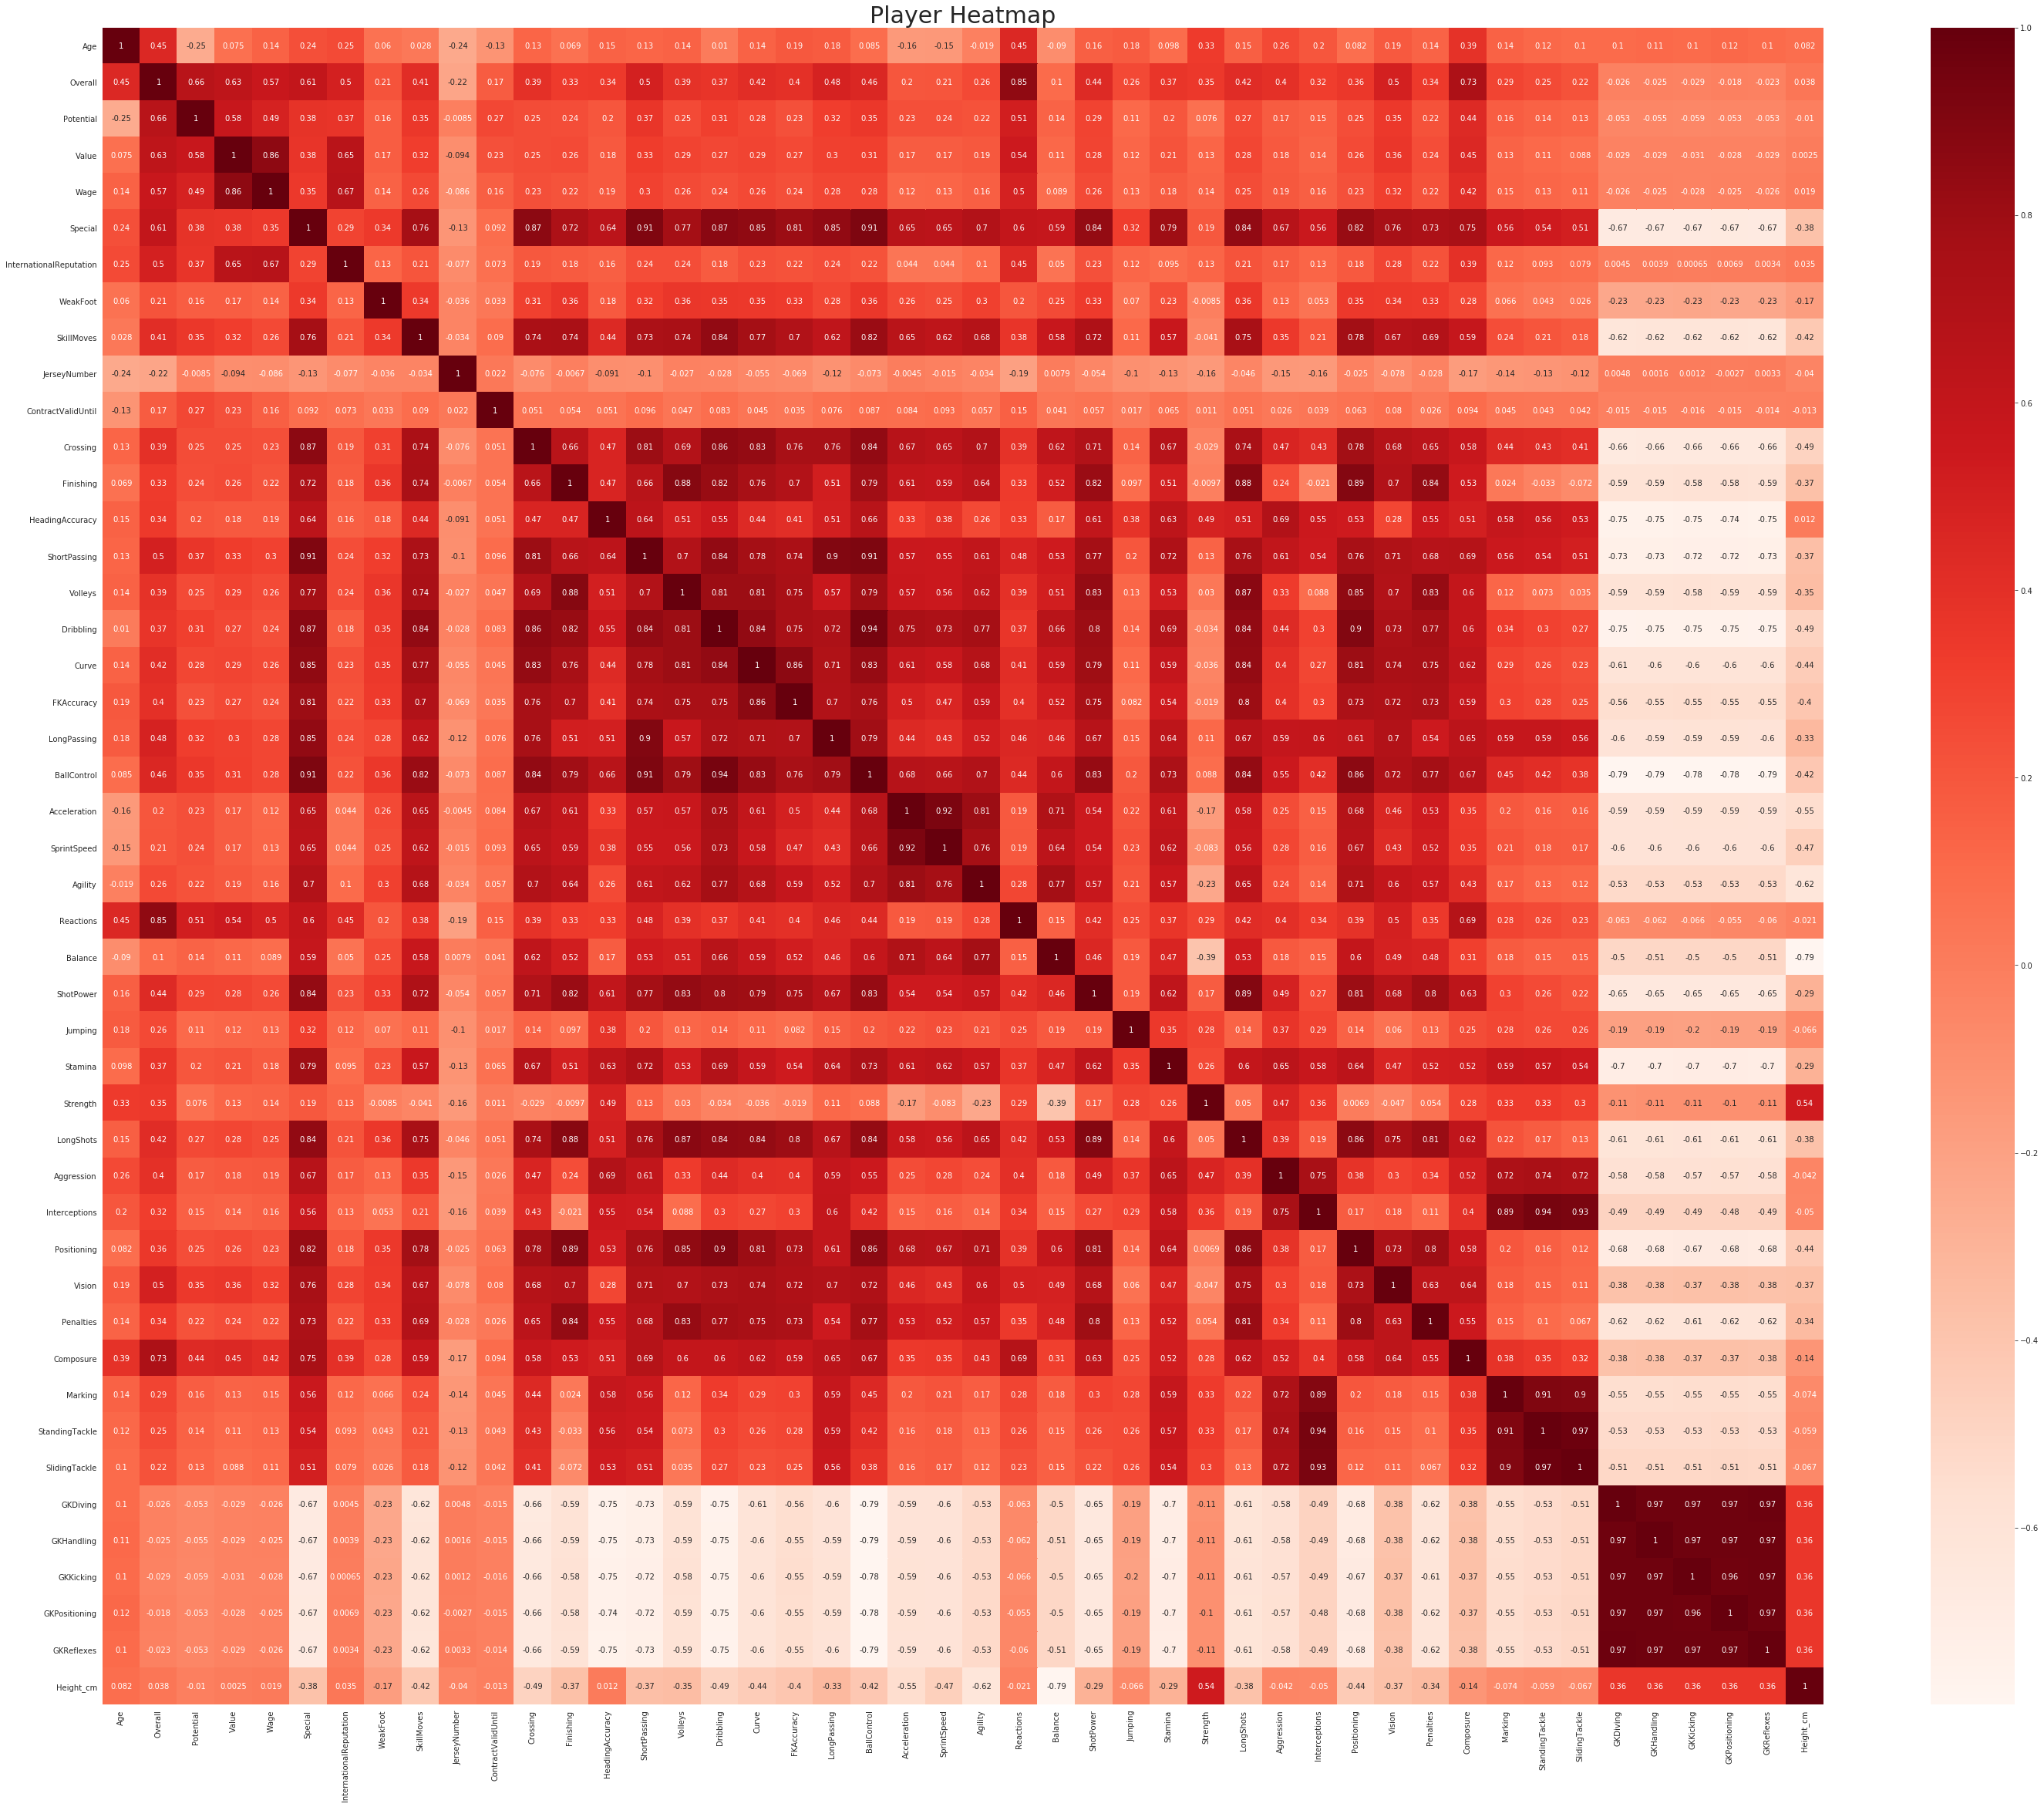

In [223]:
# Using Pearson Correlation
plt.figure(figsize = (50,40))
#cor = df.corr().loc['LS': 'RB', :]
sns.heatmap(df.corr(), annot= True, cmap = plt.cm.Reds)
plt.title("Player Heatmap", fontsize = 30)
plt.show()

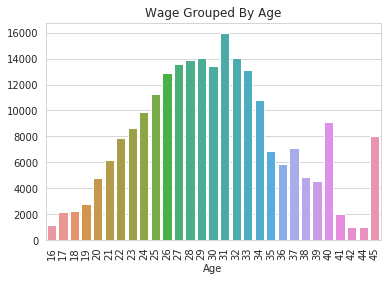

In [215]:
mean_wage = df.groupby('Age')['Wage'].mean()
_ = sns.barplot(x = mean_wage.index, y = mean_wage.values)
_ = plt.title('Wage Grouped By Age')
_ = plt.xticks(rotation=90)

# Mean Wage also peaks at around 31 (as they reach their max potential)

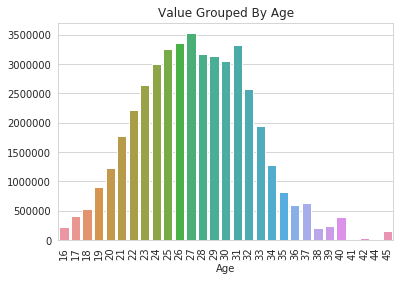

In [216]:
mean_value = df.groupby('Age')['Value'].mean()
_ = sns.barplot(x = mean_value.index, y = mean_value.values)
_ = plt.title('Value Grouped By Age')
_ = plt.xticks(rotation=90)

# Seems that players are valued higher at younger ages despite their wage 
# higher at later stages of their career.

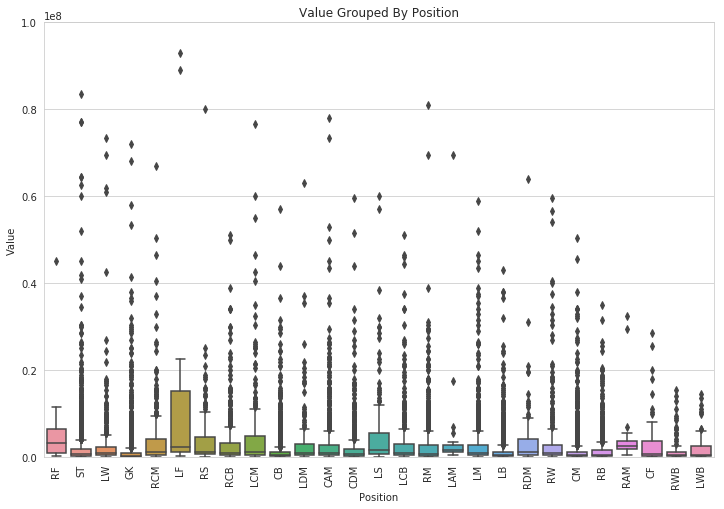

In [217]:
position_value = df.groupby('Position')['Value'].mean()
plt.figure(figsize=(12,8))
_ = sns.boxplot(x = 'Position', y = 'Value', data = df)
_ = plt.title('Value Grouped By Position')
_ = plt.xticks(rotation=90)
_ = plt.ylim(0, 100000000)

# Values seem to follow the field position where forwards are valued the most
# and goalkeepers are valued the least on average 

In [218]:
#plt.figure(figsize=(20,15))
#sns.pairplot(df)

Discuss how I can do the below code independently. 

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

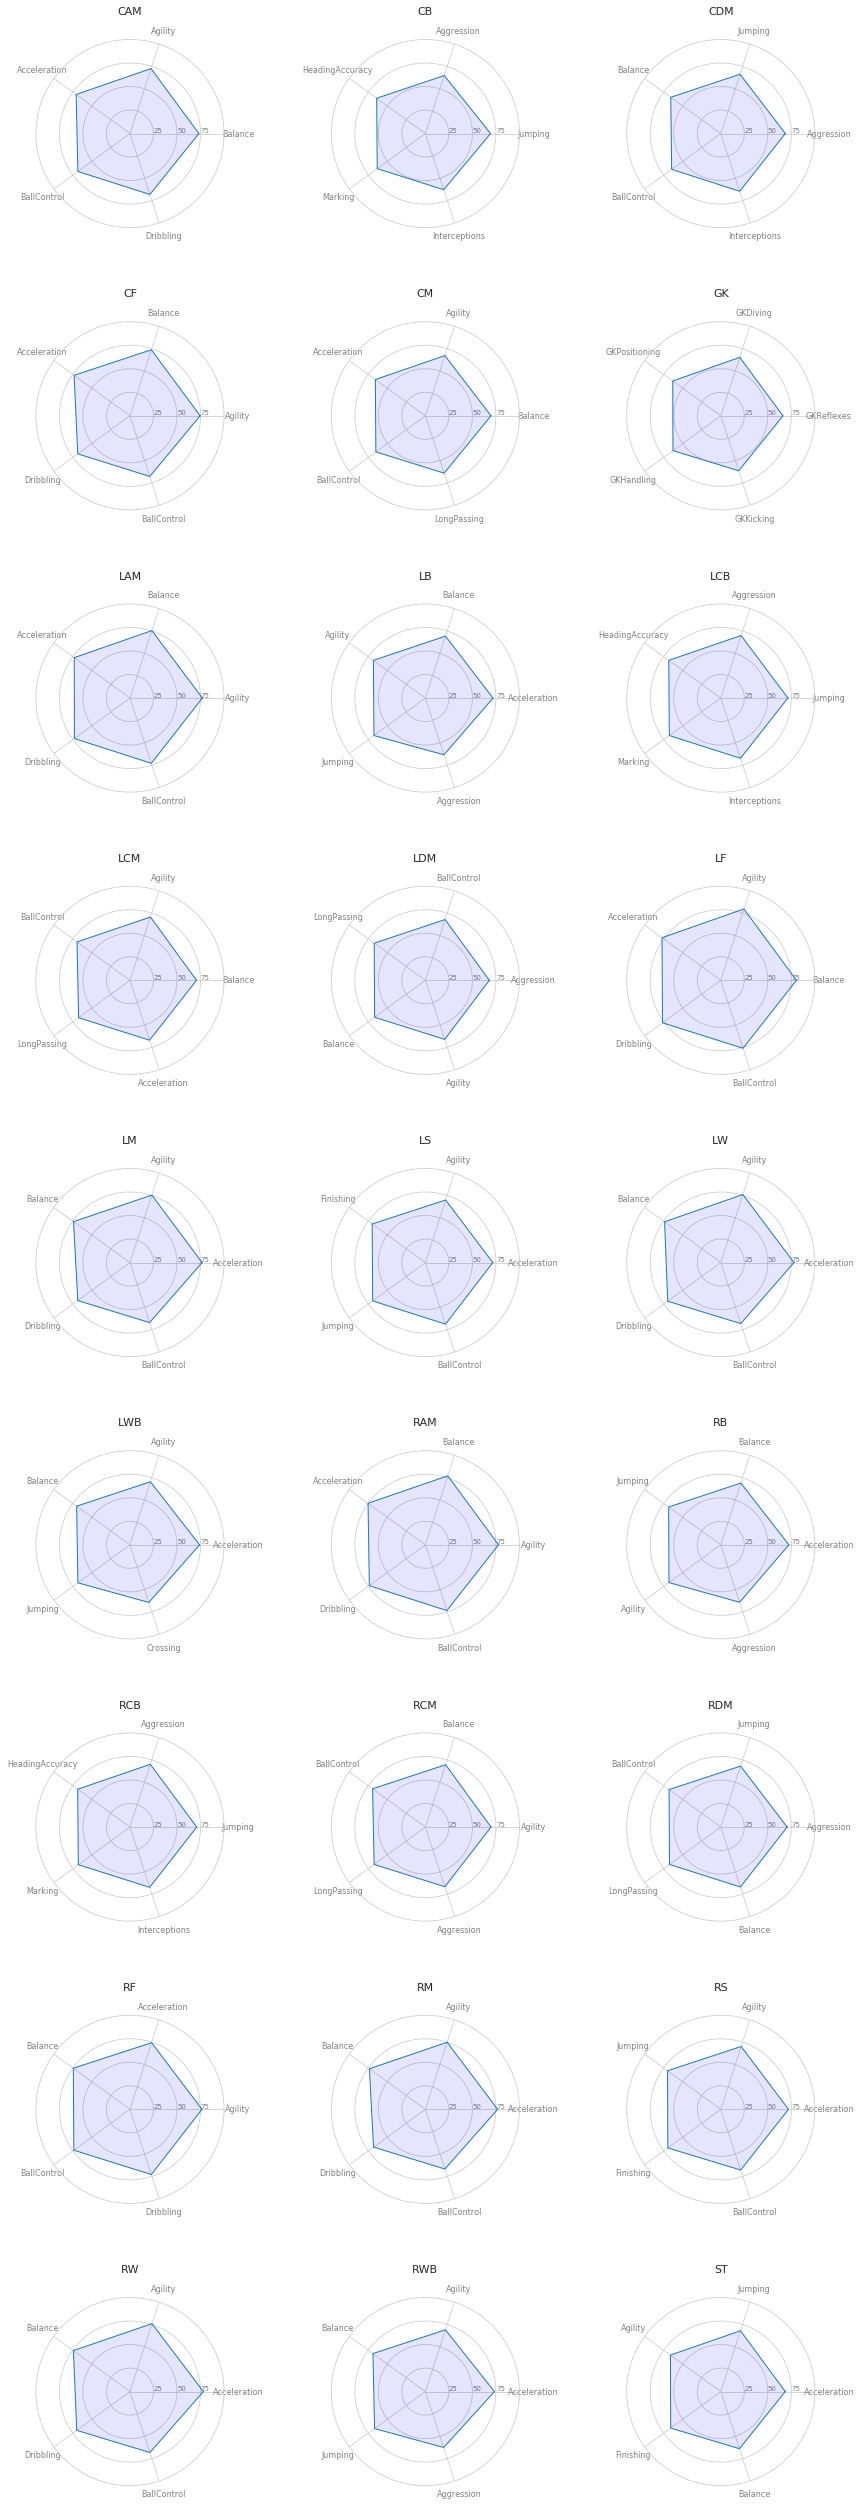

In [221]:
# Source : https://www.kaggle.com/dczerniawko/fifa19-analysis
# Start here < 

player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

# Top three features per position
for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * (22/7) for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 
    
    #  > End here

In [ ]:
# Invetigate the relationship between "Value" and other numerical Attributes
# 
# 